In [1]:
!pip install yfinance

In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import yfinance as yf
import random
import ast
import numpy as np

In [3]:
#Reading Congress csv
transactions_df = pd.read_csv("Congress Transactions 2021-2022.csv")
transactions_df

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
0,2022,1/8/2022,12/31/2021,self,IS,ironSource Ltd Class A Ordinary Shares,purchase,"$1,001 - $15,000",Deborah K. Ross,NC02,NC,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
1,2022,1/5/2022,12/31/2021,NaN,Z,Zillow Group Inc - Class C Capital Stock,sale_full,"$50,001 - $100,000",James R. Langevin,RI02,RI,https://disclosures-clerk.house.gov/public_dis...,False,Business Services,Consumer Discretionary,Democrat
2,2022,5/27/2022,12/31/2021,NaN,ETH-USD,Ethereum Crypto Currency,purchase,"$100,001 - $250,000",David Madison Cawthorn,NC11,NC,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Republican
3,2022,2/8/2022,12/31/2021,self,AAPl,Apple Inc,sale_full,"$15,001 - $50,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,Computer Manufacturing,Technology,Democrat
4,2022,2/11/2022,12/31/2021,joint,INFO,IHS Markit Ltd Common Shares,sale_full,"$15,001 - $50,000",Kathy Manning,NC06,NC,https://disclosures-clerk.house.gov/public_dis...,False,"Computer Software: Programming, Data Processing",Technology,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,2021,2/13/2021,1/4/2021,self,CHWY,"Chewy, Inc. Class A",purchase,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
4779,2021,2/13/2021,1/4/2021,self,FDX,FedEx Corporation,sale_full,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,True,Air Freight/Delivery Services,Transportation,Democrat
4780,2021,2/13/2021,1/4/2021,self,ZOOM,"Zoom Technologies, Inc.",purchase,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
4781,2021,2/13/2021,1/4/2021,self,ZM,"Zoom Video Communications, Inc. - Class A",sale_full,"$15,001 - $50,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,"Computer Software: Programming, Data Processing",Technology,Democrat


In [33]:
transactions_df['ticker'].value_counts().head(20)

MSFT     85
NTAP     77
TSLA     53
BRK.B    50
AAPL     49
NVDA     47
FB       45
AMZN     40
MMP      38
PYPL     33
BABA     33
T        32
V        31
NFLX     31
GNRC     31
FDX      30
TDDXX    28
HD       27
JPM      27
DIS      26
Name: ticker, dtype: int64

In [12]:
# create a dictionary to store the data
data = {}

# get the unique representative names
unique_reps = transactions_df['representative'].unique()

# loop through each representative
for rep in unique_reps:
  # get the data for the current representative
  rep_data = transactions_df[transactions_df['representative'] == rep]
  # get the stock ticker they traded the most
  most_traded_ticker = rep_data['ticker'].value_counts().index[0]
  #get the total count of ticker trades
  rep_ticker_counts = rep_data['ticker'].count()
  # get the highest value for that ticker
  highest_value = rep_data[rep_data['ticker'] == most_traded_ticker]['amount'].max()
  # get party affiliation  
  party = rep_data['party'].iloc[0] 
  #add trade type
  trade_type = rep_data['type'].iloc[0]
  # add the data to the dictionary
  data[rep] = [party, most_traded_ticker, rep_ticker_counts, trade_type, highest_value]
  

#create a dataframe from the dictionary
new_df = pd.DataFrame.from_dict(data, orient='index', columns=['Party', 'Ticker', 'Total Trades','Trade','Highest Value'])
new_df.index.name = 'Rep Name'
new_df = new_df.sort_values(by='Total Trades', ascending=False)

new_df

,Party,Ticker,Total Trades,Trade,Highest Value
Rep Name,,,,,
Josh Gottheimer,Democrat,MSFT,374,sale_partial,"$500,001 - $1,000,000"
Marie Newman,Democrat,TSLA,296,sale_full,"$50,001 - $100,000"
Peter Meijer,Republican,BRK.B,276,sale_full,"$1,001 - $15,000"
Susie Lee,Democrat,BLL,246,sale_full,"$1,001 - $15,000"
Mark E. Green,Republican,SHLX,245,purchase,"$500,001 - $1,000,000"
...,...,...,...,...,...
Larry Bucshon,Republican,DWAC,1,purchase,"$1,001 - $15,000"
Abigail Spanberger,Democrat,LHX,1,purchase,"$1,001 - $15,000"
Gus M. Bilirakis,Republican,MRK,1,sale_full,"$1,001 - $15,000"


In [13]:
# separate the data into two dataframes: one for Democrats and one for Republicans
democrats_df = new_df[new_df['Party'] == 'Democrat']
republicans_df = new_df[new_df['Party'] == 'Republican']

# take a random sample of 50/50 representatives from each party 
democrats_sample = democrats_df[democrats_df['Total Trades'] >= 10].sample(n=3)
republicans_sample = republicans_df[republicans_df['Total Trades'] >= 10].sample(n=3)

# Finally, concatenate the two samples into one dataframe
random_sample = pd.concat([democrats_sample, republicans_sample])

random_sample

,Party,Ticker,Total Trades,Trade,Highest Value
Rep Name,,,,,
"Donald S. Beyer, Jr.",Democrat,TDDXX,146,sale_full,"$15,001 - $50,000"
Kathy Castor,Democrat,BRK.B,13,purchase,"$1,001 - $15,000"
Debbie Dingell,Democrat,SLVM,13,sale_partial,"$1,001 - $15,000"
Virginia Foxx,Republican,T,105,sale_full,"$1,001 - $15,000"
Mark E. Green,Republican,SHLX,245,purchase,"$500,001 - $1,000,000"
Michael K. Simpson,Republican,FDN,20,sale_partial,"$15,001 - $50,000"


[*********************100%***********************]  1 of 1 completed


C:\Users\Jbauza\AppData\Local\Temp\ipykernel_15384\2842462515.py:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(date, 0, marker='D', markersize=8, color='red')


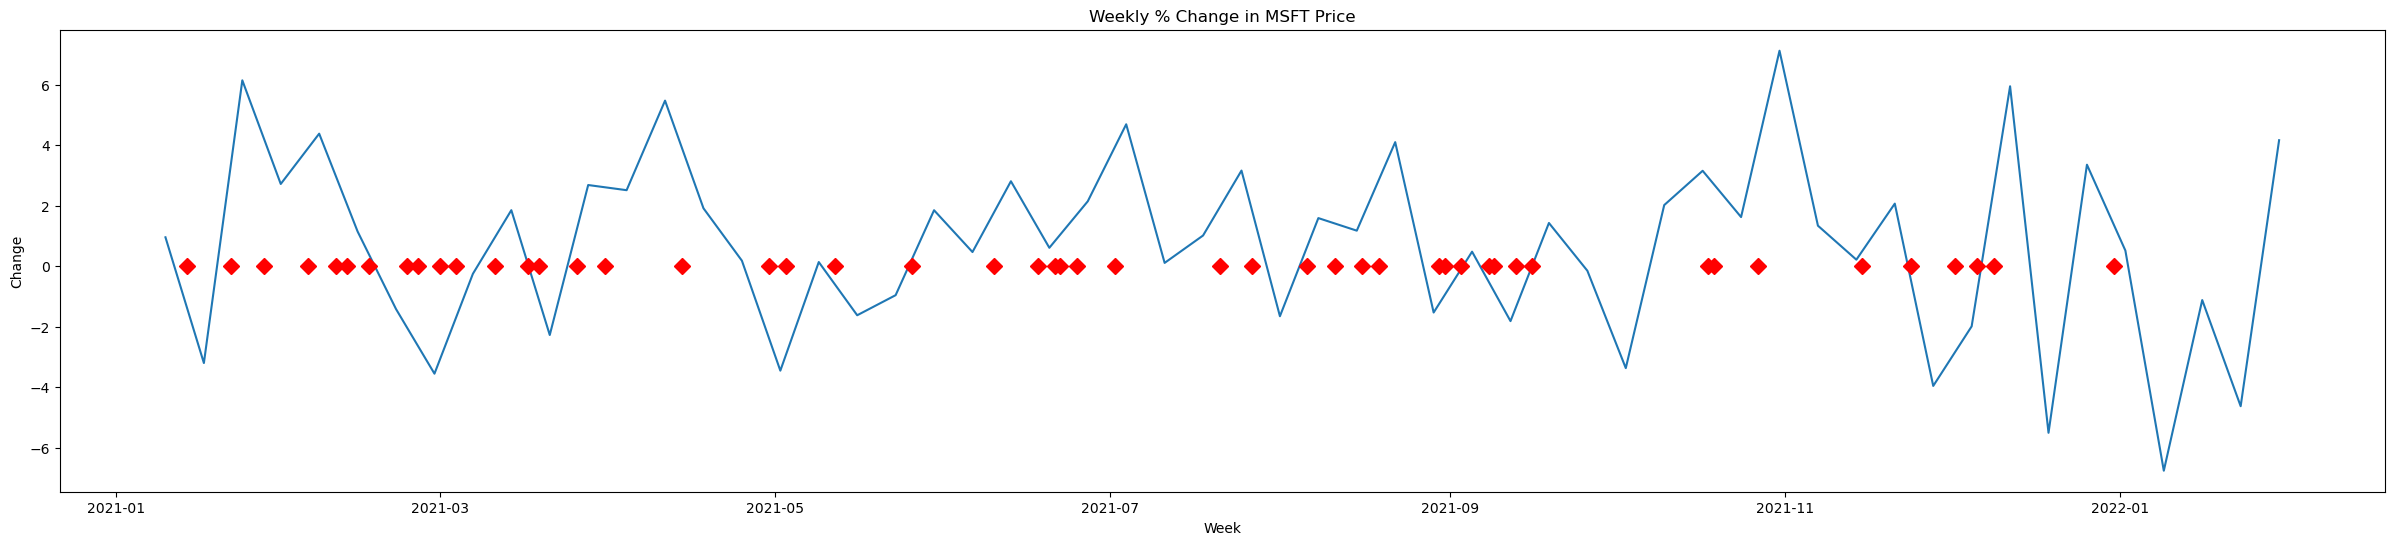

In [22]:
# Define the stock ticker you want to obtain the history data for
ticker_name = 'MSFT'

# Use the `yf.download` method to obtain the historical data
data = yf.download(ticker_name, start='2021-01-01', end='2022-01-31')

# Convert the data into a Pandas DataFrame
yf_df = pd.DataFrame(data)

# Reset the index to make the date information a column
yf_df = yf_df.reset_index()

# Set the date column as the index for the dataframe
yf_df = yf_df.set_index('Date')

# Filter the dataframe to only keep the "Adj Close" column
yf_df = yf_df[['Adj Close']]

# Calculate the daily percent change for each individual ticker
percent_change = [np.nan]
for i in range(1, len(yf_df)):
    daily_change = ((yf_df.iloc[i]['Adj Close'] - yf_df.iloc[i - 1]['Adj Close']) / yf_df.iloc[i - 1]['Adj Close'] * 100)
    percent_change.append(daily_change)

original_row = pd.DataFrame(percent_change, columns=["percent_change"])

# Set the date information as the index for the original_row dataframe
original_row = original_row.set_index(yf_df.index)

# Aggregate the daily change into weekly
weekly_change = original_row.resample('W').sum()

# Create a DataFrame with all the transaction dates for a single ticker
ticker = 'MSFT'
ticker_dates_df = transactions_df.loc[transactions_df['ticker'] == ticker_name, ['transaction_date']]

# Convert the transaction dates to datetime format
ticker_dates_df['transaction_date'] = pd.to_datetime(ticker_dates_df['transaction_date'])

# Get a list of unique dates
ticker_dates = ticker_dates_df['transaction_date'].unique()

# Plot the weekly change
fig, ax = plt.subplots(figsize=(30,6))
ax.plot_date(weekly_change.index, weekly_change['percent_change'], '-')
ax.set_xlabel('Week')
ax.set_ylabel('Change')
ax.set_title(f"Weekly % Change in {ticker_name} Price")

# Add a marker for each transaction date that falls within the date range of weekly_change
for date in ticker_dates:
    if date >= weekly_change.index.min() and date <= weekly_change.index.max():
        ax.plot_date(date, 0, marker='D', markersize=8, color='red')

plt.show()

In [21]:

ticker_dates_df.value_counts().head(10)

transaction_date
2021-08-16          10
2021-02-12           9
2021-11-15           5
2021-06-22           4
2021-02-25           3
2021-04-30           3
2021-03-19           2
2021-06-25           2
2021-08-30           2
2021-05-26           2
dtype: int64

In [34]:
# Define the stock ticker you want to obtain the history data for
ticker_name = 'NTAP'

# Use the `yf.download` method to obtain the historical data
data = yf.download(ticker_name, start='2021-01-01', end='2022-01-31')

# Convert the data into a Pandas DataFrame
yf_df = pd.DataFrame(data)

# Reset the index to make the date information a column
yf_df = yf_df.reset_index()

# Set the date column as the index for the dataframe
yf_df = yf_df.set_index('Date')

# Filter the dataframe to only keep the "Adj Close" column
yf_df = yf_df[['Adj Close']]

# Calculate the daily percent change for each individual ticker
percent_change = [np.nan]
for i in range(1, len(yf_df)):
    daily_change = ((yf_df.iloc[i]['Adj Close'] - yf_df.iloc[i - 1]['Adj Close']) / yf_df.iloc[i - 1]['Adj Close'] * 100)
    percent_change.append(daily_change)

original_row = pd.DataFrame(percent_change, columns=["percent_change"])

# Set the date information as the index for the original_row dataframe
original_row = original_row.set_index(yf_df.index)



[*********************100%***********************]  1 of 1 completed


C:\Users\Jbauza\AppData\Local\Temp\ipykernel_15384\83303118.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(date, 0, marker='D', markersize=8, color='red')


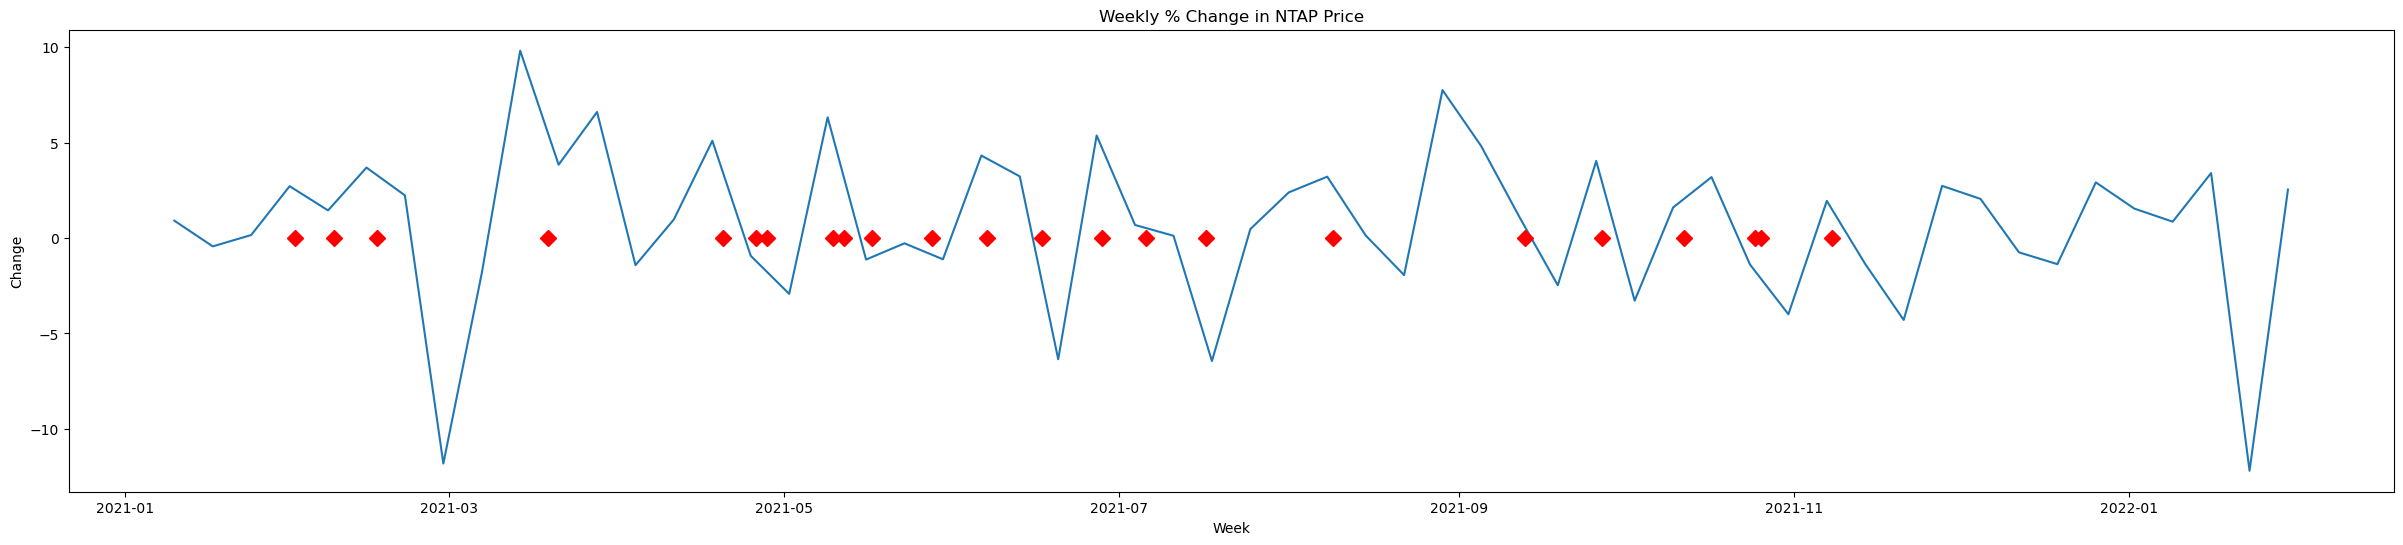

In [35]:
# Aggregate the daily change into weekly
weekly_change = original_row.resample('W').sum()

# Create a DataFrame with all the transaction dates for a single ticker
ticker = 'NTAP'
ticker_dates_df = transactions_df.loc[transactions_df['ticker'] == ticker_name, ['transaction_date']]

# Convert the transaction dates to datetime format
ticker_dates_df['transaction_date'] = pd.to_datetime(ticker_dates_df['transaction_date'])

# Get a list of unique dates
ticker_dates = ticker_dates_df['transaction_date'].unique()

# Plot the weekly change
fig, ax = plt.subplots(figsize=(30,6))
ax.plot_date(weekly_change.index, weekly_change['percent_change'], '-')
ax.set_xlabel('Week')
ax.set_ylabel('Change')
ax.set_title(f"Weekly % Change in {ticker_name} Price")

# Add a marker for each transaction date that falls within the date range of weekly_change
for date in ticker_dates:
    if date >= weekly_change.index.min() and date <= weekly_change.index.max():
        ax.plot_date(date, 0, marker='D', markersize=8, color='red')

plt.show()

In [36]:
ticker_dates_df.value_counts().head(10)

transaction_date
2021-02-01          8
2021-04-20          6
2021-11-08          6
2021-05-28          5
2021-02-16          4
2021-03-19          3
2021-10-26          3
2021-10-25          3
2021-10-12          3
2021-09-27          3
dtype: int64

[*********************100%***********************]  1 of 1 completed


C:\Users\Jbauza\AppData\Local\Temp\ipykernel_15384\1731544241.py:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(date, 0, marker='D', markersize=8, color='red')


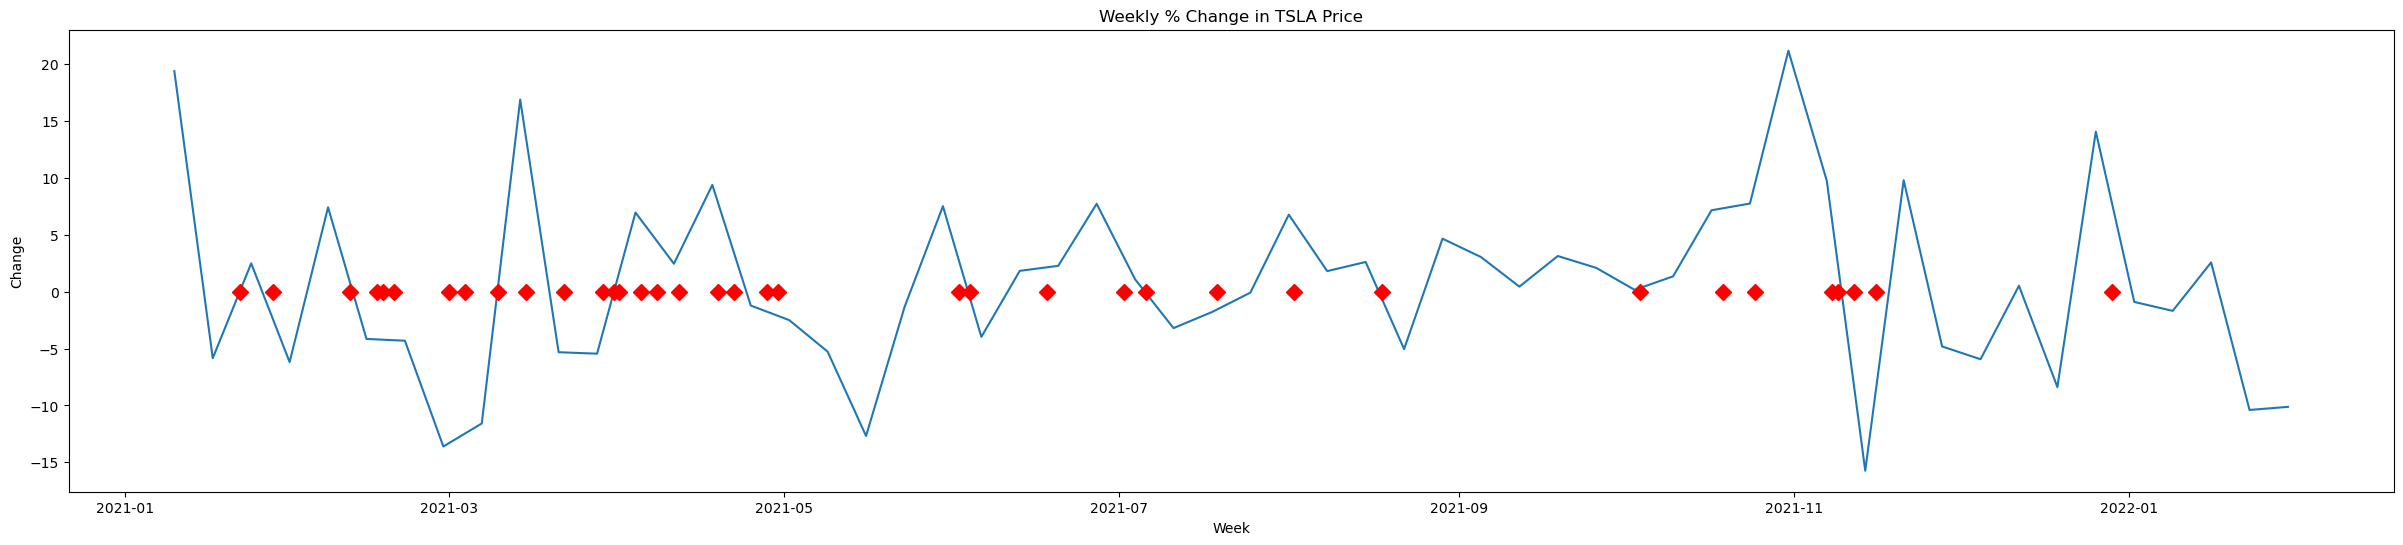

In [37]:
# Define the stock ticker you want to obtain the history data for
ticker_name = 'TSLA'

# Use the `yf.download` method to obtain the historical data
data = yf.download(ticker_name, start='2021-01-01', end='2022-01-31')

# Convert the data into a Pandas DataFrame
yf_df = pd.DataFrame(data)

# Reset the index to make the date information a column
yf_df = yf_df.reset_index()

# Set the date column as the index for the dataframe
yf_df = yf_df.set_index('Date')

# Filter the dataframe to only keep the "Adj Close" column
yf_df = yf_df[['Adj Close']]

# Calculate the daily percent change for each individual ticker
percent_change = [np.nan]
for i in range(1, len(yf_df)):
    daily_change = ((yf_df.iloc[i]['Adj Close'] - yf_df.iloc[i - 1]['Adj Close']) / yf_df.iloc[i - 1]['Adj Close'] * 100)
    percent_change.append(daily_change)

original_row = pd.DataFrame(percent_change, columns=["percent_change"])

# Set the date information as the index for the original_row dataframe
original_row = original_row.set_index(yf_df.index)

# Aggregate the daily change into weekly
weekly_change = original_row.resample('W').sum()

# Create a DataFrame with all the transaction dates for a single ticker
ticker = 'TSLA'
ticker_dates_df = transactions_df.loc[transactions_df['ticker'] == ticker_name, ['transaction_date']]

# Convert the transaction dates to datetime format
ticker_dates_df['transaction_date'] = pd.to_datetime(ticker_dates_df['transaction_date'])

# Get a list of unique dates
ticker_dates = ticker_dates_df['transaction_date'].unique()

# Plot the weekly change
fig, ax = plt.subplots(figsize=(30,6))
ax.plot_date(weekly_change.index, weekly_change['percent_change'], '-')
ax.set_xlabel('Week')
ax.set_ylabel('Change')
ax.set_title(f"Weekly % Change in {ticker_name} Price")

# Add a marker for each transaction date that falls within the date range of weekly_change
for date in ticker_dates:
    if date >= weekly_change.index.min() and date <= weekly_change.index.max():
        ax.plot_date(date, 0, marker='D', markersize=8, color='red')

plt.show()

In [38]:
ticker_dates_df.value_counts().head(10)

transaction_date
2021-04-30          4
2021-03-22          3
2021-03-29          2
2021-02-11          2
2021-04-19          2
2021-07-06          2
2021-08-02          2
2021-04-01          2
2021-08-18          2
2021-04-22          2
dtype: int64

In [43]:
# Define the stock ticker you want to obtain the history data for
ticker_name = 'AAPL'

# Use the `yf.download` method to obtain the historical data
data = yf.download(ticker_name, start='2021-01-01', end='2022-01-31')

# Convert the data into a Pandas DataFrame
yf_df = pd.DataFrame(data)

# Reset the index to make the date information a column
yf_df = yf_df.reset_index()

# Set the date column as the index for the dataframe
yf_df = yf_df.set_index('Date')

# Filter the dataframe to only keep the "Adj Close" column
yf_df = yf_df[['Adj Close']]

# Calculate the daily percent change for each individual ticker
percent_change = [np.nan]
for i in range(1, len(yf_df)):
    daily_change = ((yf_df.iloc[i]['Adj Close'] - yf_df.iloc[i - 1]['Adj Close']) / yf_df.iloc[i - 1]['Adj Close'] * 100)
    percent_change.append(daily_change)

original_row = pd.DataFrame(percent_change, columns=["percent_change"])

# Set the date information as the index for the original_row dataframe
original_row = original_row.set_index(yf_df.index)

[*********************100%***********************]  1 of 1 completed


C:\Users\Jbauza\AppData\Local\Temp\ipykernel_15384\4192185087.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(date, 0, marker='D', markersize=8, color='red')


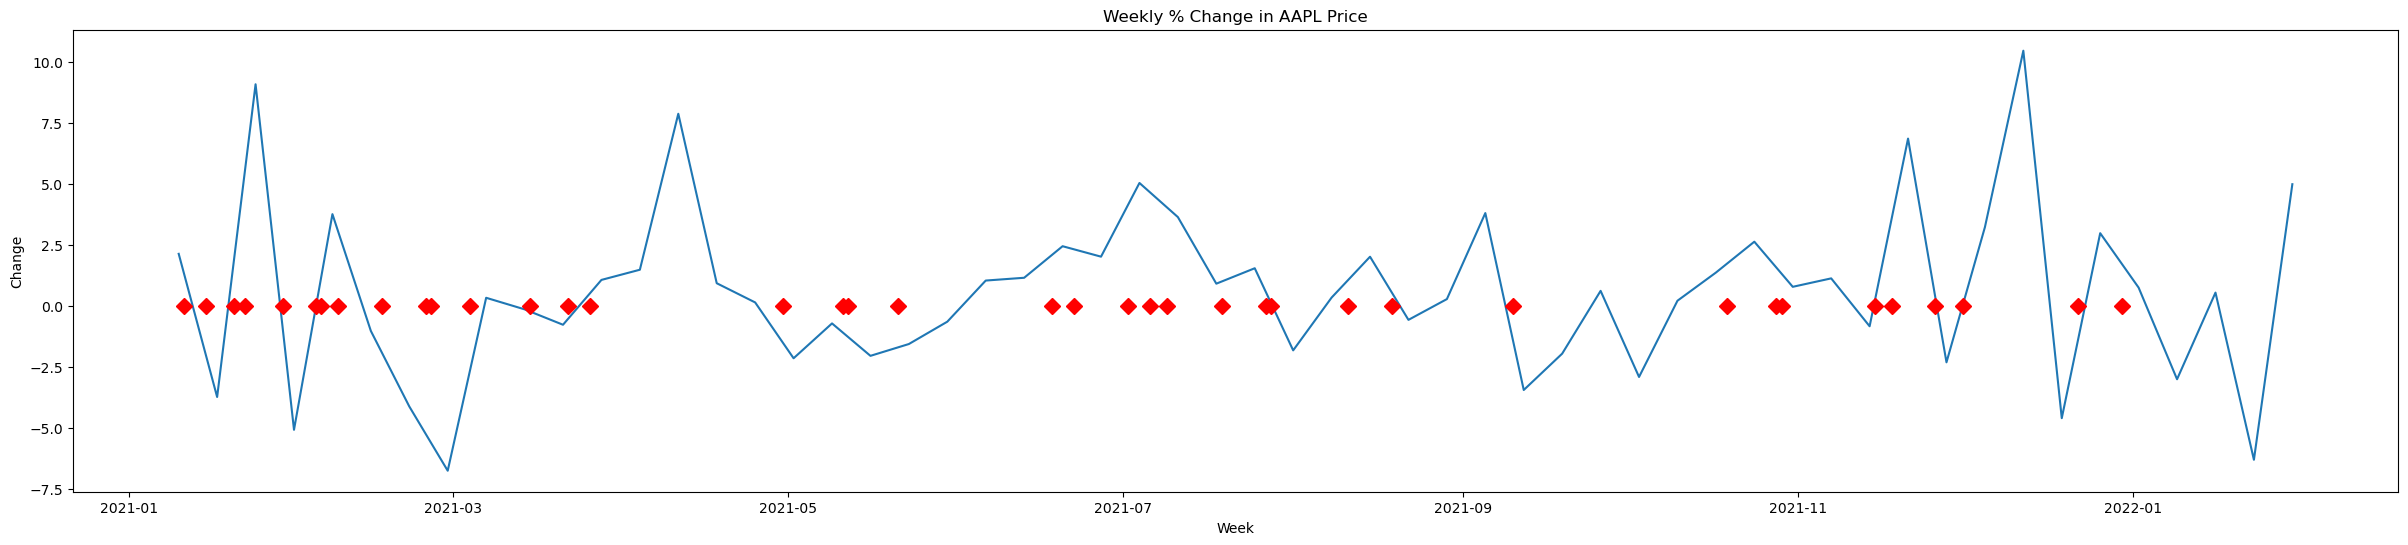

In [44]:
# Aggregate the daily change into weekly
weekly_change = original_row.resample('W').sum()

# Create a DataFrame with all the transaction dates for a single ticker
ticker = 'AAPL'
ticker_dates_df = transactions_df.loc[transactions_df['ticker'] == ticker_name, ['transaction_date']]

# Convert the transaction dates to datetime format
ticker_dates_df['transaction_date'] = pd.to_datetime(ticker_dates_df['transaction_date'])

# Get a list of unique dates
ticker_dates = ticker_dates_df['transaction_date'].unique()

# Plot the weekly change
fig, ax = plt.subplots(figsize=(30,6))
ax.plot_date(weekly_change.index, weekly_change['percent_change'], '-')
ax.set_xlabel('Week')
ax.set_ylabel('Change')
ax.set_title(f"Weekly % Change in {ticker_name} Price")

# Add a marker for each transaction date that falls within the date range of weekly_change
for date in ticker_dates:
    if date >= weekly_change.index.min() and date <= weekly_change.index.max():
        ax.plot_date(date, 0, marker='D', markersize=8, color='red')

plt.show()

In [45]:
ticker_dates_df.value_counts().head(10)

transaction_date
2021-12-30          3
2021-03-04          3
2021-01-15          3
2021-01-20          2
2021-07-19          2
2021-10-29          2
2021-07-09          1
2021-07-27          1
2021-07-28          1
2021-08-11          1
dtype: int64

In [ ]:
# Define the stock ticker you want to obtain the history data for
ticker_name = 'NVDA'

# Use the `yf.download` method to obtain the historical data
data = yf.download(ticker_name, start='2021-01-01', end='2022-01-31')

# Convert the data into a Pandas DataFrame
yf_df = pd.DataFrame(data)

# Reset the index to make the date information a column
yf_df = yf_df.reset_index()

# Set the date column as the index for the dataframe
yf_df = yf_df.set_index('Date')

# Filter the dataframe to only keep the "Adj Close" column
yf_df = yf_df[['Adj Close']]

# Calculate the daily percent change for each individual ticker
percent_change = [np.nan]
for i in range(1, len(yf_df)):
    daily_change = ((yf_df.iloc[i]['Adj Close'] - yf_df.iloc[i - 1]['Adj Close']) / yf_df.iloc[i - 1]['Adj Close'] * 100)
    percent_change.append(daily_change)

original_row = pd.DataFrame(percent_change, columns=["percent_change"])

# Set the date information as the index for the original_row dataframe
original_row = original_row.set_index(yf_df.index)

C:\Users\Jbauza\AppData\Local\Temp\ipykernel_15384\2479227781.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(date, 0, marker='D', markersize=8, color='red')


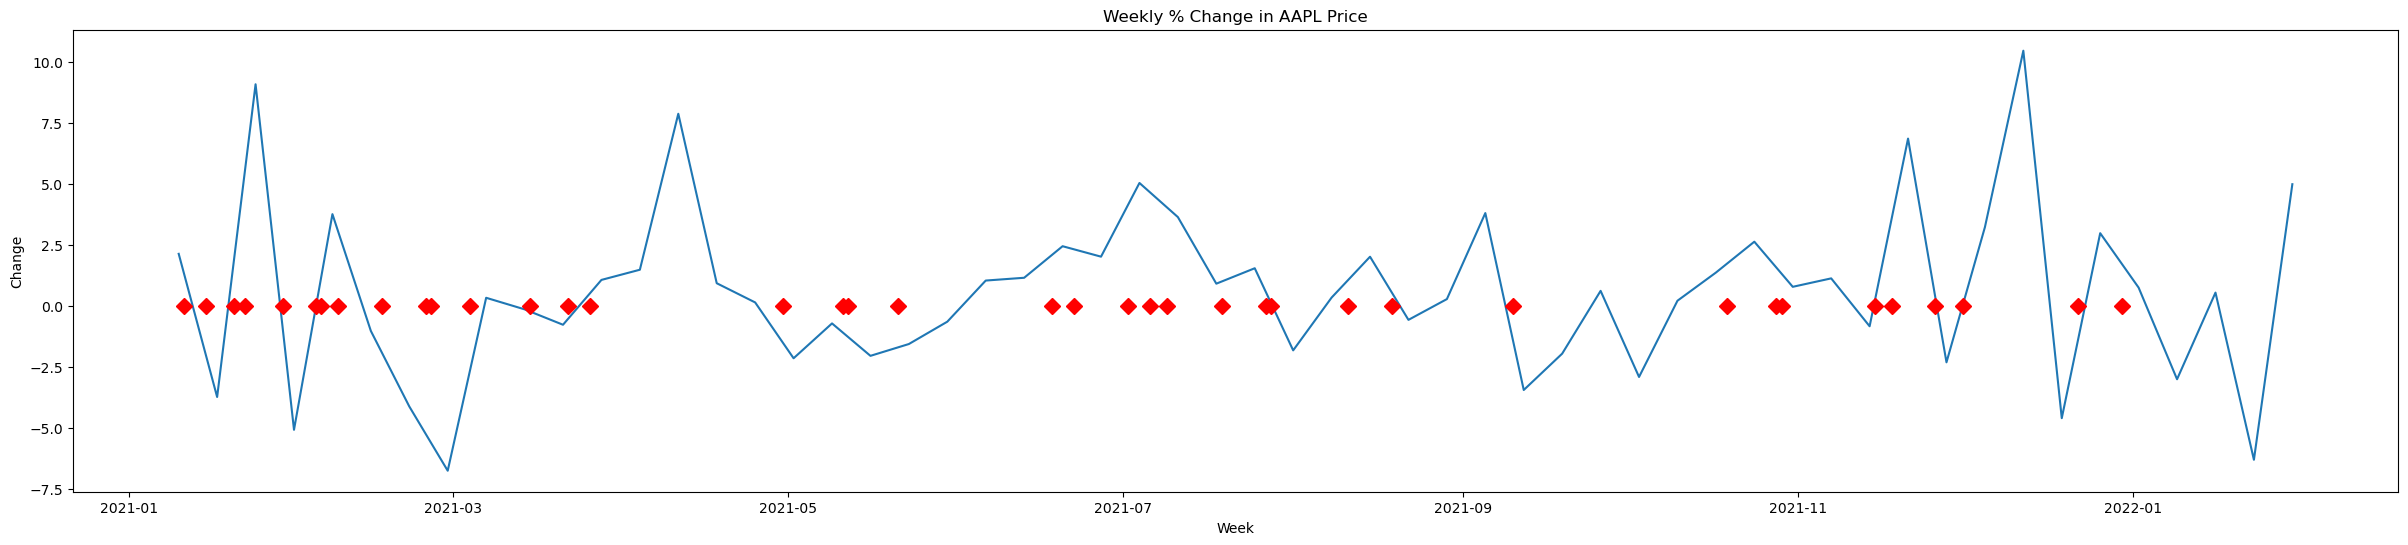

In [46]:
# Aggregate the daily change into weekly
weekly_change = original_row.resample('W').sum()

# Create a DataFrame with all the transaction dates for a single ticker
ticker = 'NVDA'
ticker_dates_df = transactions_df.loc[transactions_df['ticker'] == ticker_name, ['transaction_date']]

# Convert the transaction dates to datetime format
ticker_dates_df['transaction_date'] = pd.to_datetime(ticker_dates_df['transaction_date'])

# Get a list of unique dates
ticker_dates = ticker_dates_df['transaction_date'].unique()

# Plot the weekly change
fig, ax = plt.subplots(figsize=(30,6))
ax.plot_date(weekly_change.index, weekly_change['percent_change'], '-')
ax.set_xlabel('Week')
ax.set_ylabel('Change')
ax.set_title(f"Weekly % Change in {ticker_name} Price")

# Add a marker for each transaction date that falls within the date range of weekly_change
for date in ticker_dates:
    if date >= weekly_change.index.min() and date <= weekly_change.index.max():
        ax.plot_date(date, 0, marker='D', markersize=8, color='red')

plt.show()

In [48]:
ticker_dates_df.value_counts().head(15)

transaction_date
2021-12-30          3
2021-03-04          3
2021-01-15          3
2021-01-20          2
2021-07-19          2
2021-10-29          2
2021-07-09          1
2021-07-27          1
2021-07-28          1
2021-08-11          1
2021-08-19          1
2021-09-10          1
2021-10-28          1
2021-10-19          1
2021-07-02          1
dtype: int64